In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [2]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [4]:
path = "/content/gdrive/MyDrive/MachineLearning/praktikum/prak7/"

In [7]:
df = pd.read_csv(path + "/data/apples_and_oranges.csv")
df.head()

,Weight,Size,Class
0,69,4.39,orange
1,69,4.21,orange
2,65,4.09,orange
3,72,5.85,apple
4,67,4.70,orange


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40 entries, 0 to 39
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Weight  40 non-null     int64  
 1   Size    40 non-null     float64
 2   Class   40 non-null     object 
dtypes: float64(1), int64(1), object(1)
memory usage: 1.1+ KB


In [9]:
df.describe()

,Weight,Size
count,40.000000,40.000000
mean,70.200000,4.922750
std,3.039906,0.590063
min,65.000000,4.010000
25%,68.000000,4.360000
50%,70.000000,4.930000
75%,73.000000,5.472500
max,75.000000,5.850000


In [11]:
df["Class"].unique()

array(['orange', 'apple'], dtype=object)

In [12]:
df["Class"].value_counts()

,count
Class,
orange,20
apple,20


In [14]:
x = df[['Weight','Size']]

y = df['Class']

In [15]:
x.head()

,Weight,Size
0,69,4.39
1,69,4.21
2,65,4.09
3,72,5.85
4,67,4.70


In [16]:
y.head()

,Class
0,orange
1,orange
2,orange
3,apple
4,orange


In [33]:
import pandas as pd
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

print("Jumlah data latih:", len(X_train))
print("Jumlah data uji:", len(X_test))

Jumlah data latih: 32
Jumlah data uji: 8


In [34]:
model = SVC (kernel='linear')
model.fit(X_train, y_train)

SVC(kernel='linear')

In [24]:
 y_pred = model.predict(X_test)

#akurasi
print(f"Akurasi: {accuracy_score(y_test, y_pred) * 100.2}%")

#klasifik
print("\nLaporan Klasifikasi : \n", classification_report(y_test, y_pred))

Akurasi: 100.2%

Laporan Klasifikasi : 
               precision    recall  f1-score   support

       apple       1.00      1.00      1.00         3
      orange       1.00      1.00      1.00         5

    accuracy                           1.00         8
   macro avg       1.00      1.00      1.00         8
weighted avg       1.00      1.00      1.00         8




Confusion Matrix: 
 [[3 0]
 [0 5]]


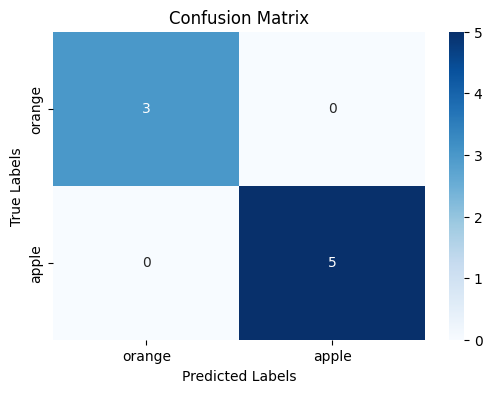

In [26]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt
import seaborn as sns

print("\nConfusion Matrix: \n", confusion_matrix(y_test, y_pred))

cm = confusion_matrix(y_test, y_pred)

class_names = ['orange','apple']

plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=class_names,
            yticklabels=class_names)
plt.title("Confusion Matrix")
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.show()

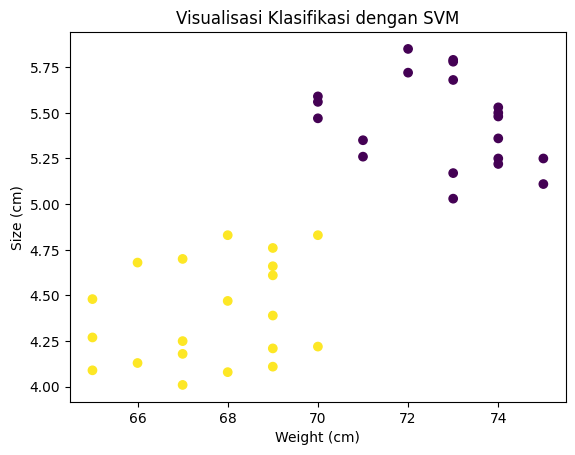

In [32]:
import matplotlib.pyplot as plt
import pandas as pd

# Map 'Class' column to numerical values
color_map = {'apple': 0, 'orange': 1}
colors = df['Class'].map(color_map)

plt.scatter(df['Weight'], df['Size'], c=colors)

plt.xlabel('Weight (cm)')
plt.ylabel('Size (cm)')
plt.title('Visualisasi Klasifikasi dengan SVM')
plt.show()

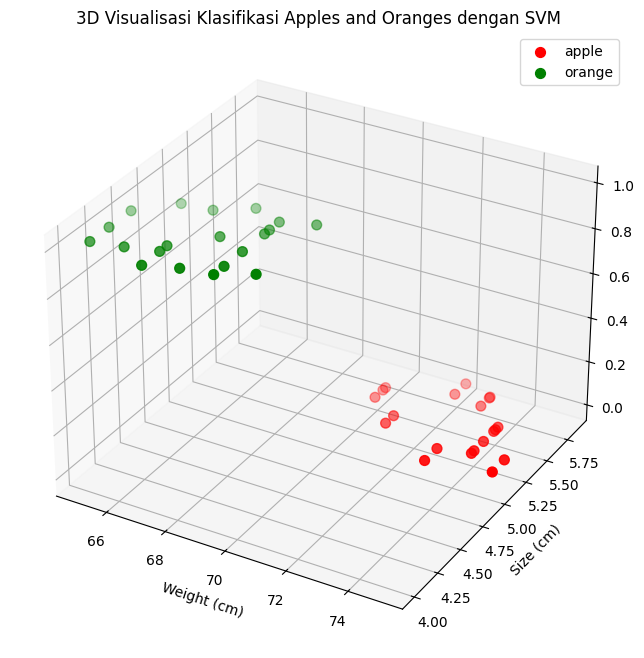

In [31]:
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score
from mpl_toolkits.mplot3d import Axes3D

#3 Encode label (ubah teks jadi angka)
le = LabelEncoder()
df['ClassEncoded'] = le.fit_transform(df['Class'])

#8. Plot 3D hasil klasifikasi
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

# Warna untuk tiap kelas
colors = ['r', 'g']
labels = le.classes_

# Plot tiap spesies dengan warna berbeda
for i, species in enumerate(labels):
    subset = df [df['ClassEncoded'] == i]
    ax.scatter(
    subset['Weight'],
    subset['Size'], subset['ClassEncoded'], color=colors[i],
    label=species,
    s=50
  )


ax.set_xlabel('Weight (cm)')
ax.set_ylabel('Size (cm)')
ax.set_title('3D Visualisasi Klasifikasi Apples and Oranges dengan SVM')
ax.legend()
plt.show()